# Decision Tree Classification with Iris Data

## Definition

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.



### The objective is to:
* Develop a classification model using Decision Tree Algorithm
* Evaluate the Model to know its efficiency in making predictions


### Process required to achieve the objective
* Initial Data Understanding
* Import necessary libraries
* Data Importation using Pandas to create easily readable dataframe
* Exploration of Data - Checking general data overview using 'describe' amd 'info' 
* Data Visualisation to understand how the features are distributed in the data
* Define Dependent and Independent variables for our model
* Split the data into training and testing using sklearn
* Build the Decision Tree model using sklearn
* Make Predictions
* Perform prediction
* Visualise Tree
* Remarks

### Initial Understanding of data

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

### Libraries import

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Data Import

In [28]:
df = pd.read_csv('iris.csV')

In [29]:
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
df.tail()

,sepalLength,sepalWidth,petalLength,petalWidth,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Data Exploration

In [30]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### lets check if there are missing data

In [32]:
df.isnull().values.any()

False

#### Lets look at the unique features in the species column

In [33]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
df.iloc[50,:]

sepalLength                  7
sepalWidth                 3.2
petalLength                4.7
petalWidth                 1.4
species        Iris-versicolor
Name: 50, dtype: object

## Data Visualisation

In [68]:
import seaborn as sns

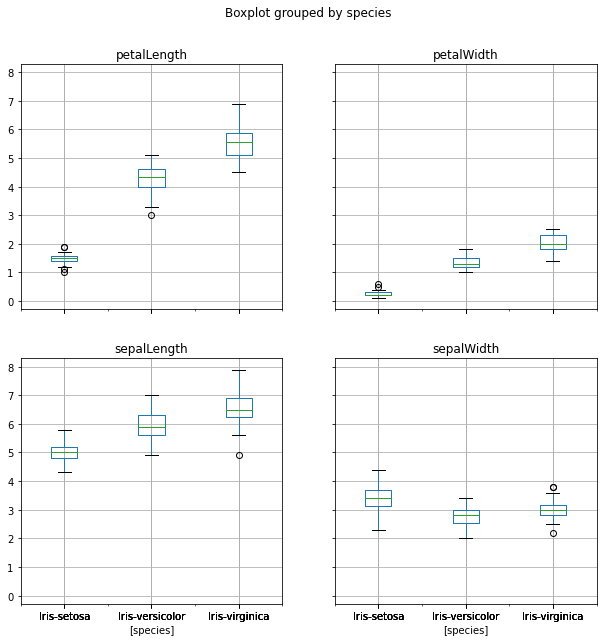

In [83]:
df.boxplot(by="species", figsize=(10, 10))
plt.show()

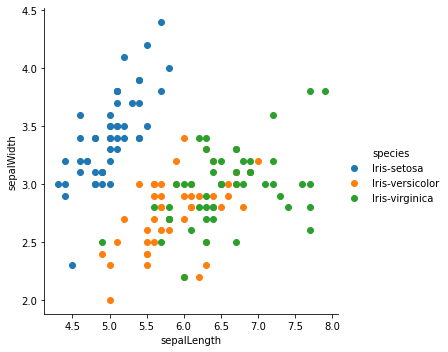

In [71]:
sns.FacetGrid(df, hue="species", size=5) \
   .map(plt.scatter, "sepalLength", "sepalWidth") \
   .add_legend()
plt.show()

C:\Users\mumun\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


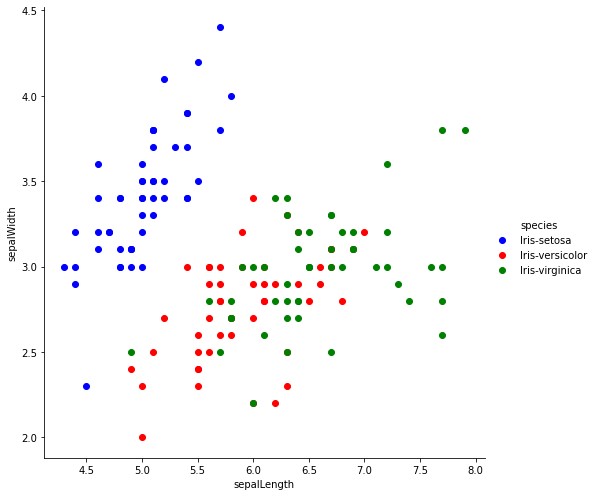

In [78]:
KS = {'color': ['blue', 'red', 'green']}
sns.FacetGrid(df, hue_kws=KS, hue="species", size=7) \
   .map(plt.scatter, "sepalLength", "sepalWidth") \
   .add_legend()
plt.show()

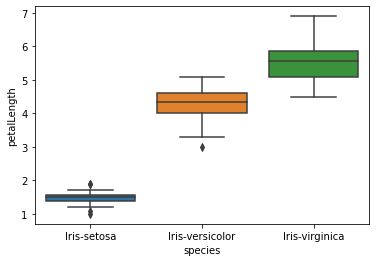

In [81]:
sns.boxplot(x="species", y="petalLength", data=df )
plt.show()

## Defining our Dependent and Independent Parameters

In [38]:
X = df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [39]:
y = df["species"]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [42]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

#### lets print the shape of X_trainset and y_trainset ensuring that the dimensions match.

In [43]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (105, 4) &  Size of Y training set (105,)


#### lets print the shape of X_trainset and y_trainset ensuring that the dimensions match.

In [44]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (45, 4) &  Size of Y training set (45,)


## Model Building

* We will first create an instance of the DecisionTreeClassifier called iris_tree.

* Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [46]:
import sklearn.tree as tree

from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
iris_tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [48]:
iris_tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction

#### Let's make some predictions on the testing dataset and store it into a variable called pred_tree.

In [51]:
pred_tree = iris_tree.predict(X_testset)

#### lets print out pred_tree and y_testset to visually compare the predictions to the actual values.

In [57]:
print (pred_tree [0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [60]:
print (y_testset [0:15])

47         Iris-setosa
3          Iris-setosa
31         Iris-setosa
25         Iris-setosa
15         Iris-setosa
118     Iris-virginica
89     Iris-versicolor
6          Iris-setosa
103     Iris-virginica
65     Iris-versicolor
88     Iris-versicolor
38         Iris-setosa
92     Iris-versicolor
53     Iris-versicolor
140     Iris-virginica
Name: species, dtype: object


## Evaluation.

#### let's import metrics from sklearn and check the accuracy of our model

In [61]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, pred_tree))

DecisionTrees's Accuracy:  0.9111111111111111


* Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

* In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

## Visualisation of the Tree

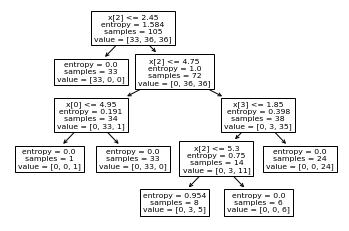

In [73]:
tree.plot_tree(iris_tree)

plt.show()

# Remarks
* We had a 91% accuracy making us believe that we can rely on our model to make predictions